<a href="https://colab.research.google.com/github/Ani-94/ANN_Deep_learning/blob/main/ANN_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ori_df = pd.read_csv('https://raw.githubusercontent.com/Ani-94/Finance_ML/main/HousingData.csv')

In [3]:
ori_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [4]:
df= ori_df.copy()

In [5]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [6]:
null_features=[feature for feature in df.columns if df[feature].isnull().sum()>=1]

In [7]:
null_features

['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']

In [8]:
df[null_features]=df[null_features].fillna(df[null_features].mean())

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
df1=df.copy()

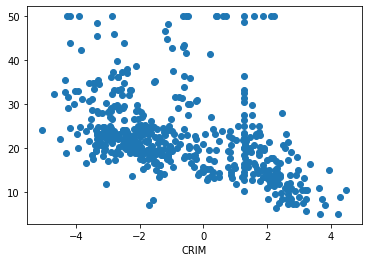

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


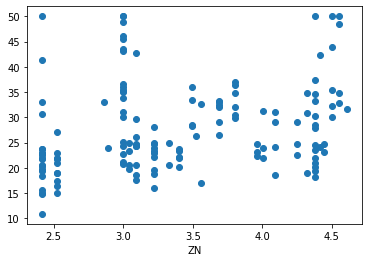

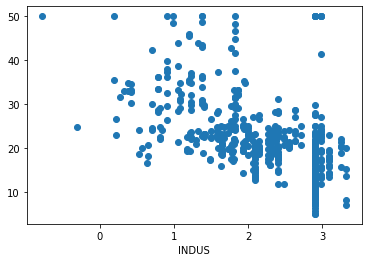

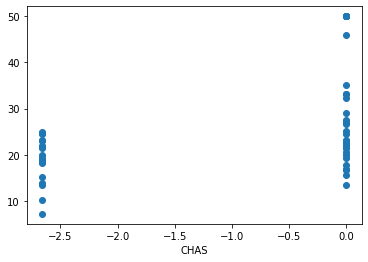

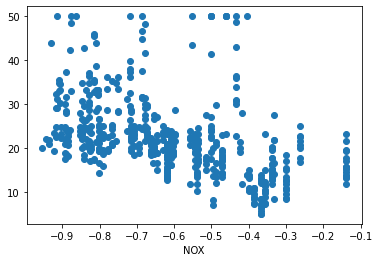

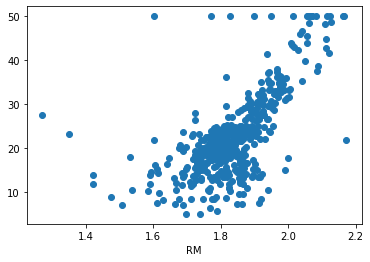

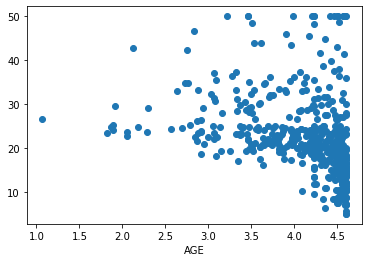

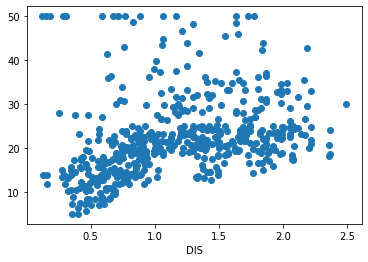

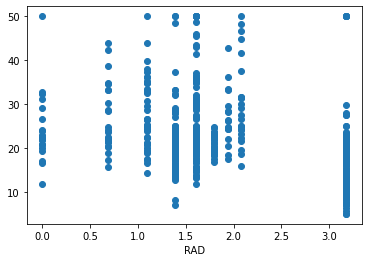

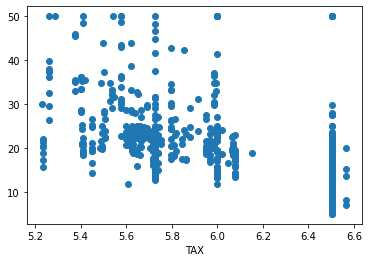

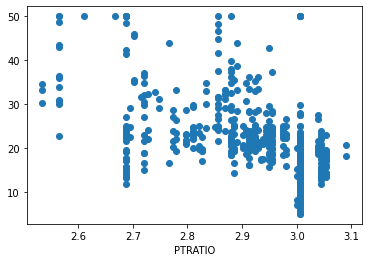

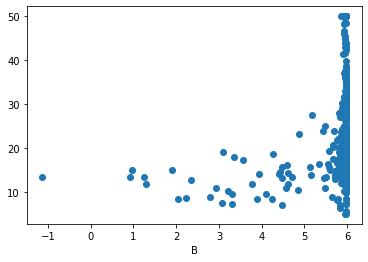

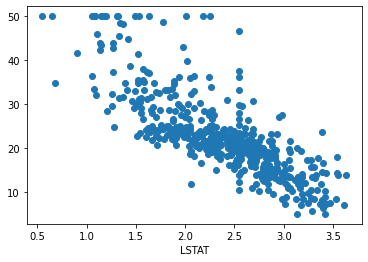

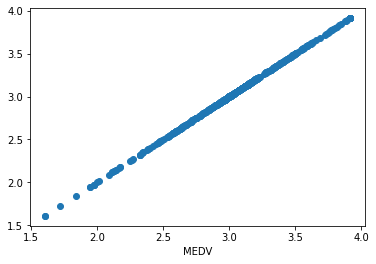

In [11]:

dfg=df1.copy()
for i in dfg.columns:
 dfg[i]=np.log(dfg[i])
 plt.scatter(dfg[i],dfg['MEDV'])
 plt.xlabel(i)
 plt.show()

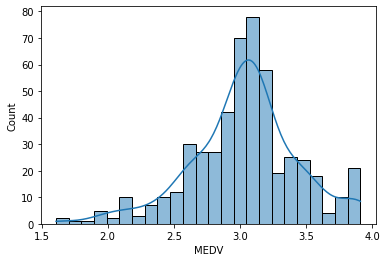

In [12]:
sns.histplot(dfg['MEDV'],kde=True)

In [13]:
df1.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.052223,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.036147,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.058035,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.052223,-0.036147,0.058035,1.000000,0.073286,0.102284,0.075206,-0.091680,0.001425,-0.031483,-0.109310,0.050055,-0.046166,0.179882
NOX,0.410377,-0.502287,0.740965,0.073286,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.102284,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.075206,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.091680,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,0.001425,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.031483,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


In [14]:
x = df1.loc[:,df.columns!='MEDV']
y= df1.loc[:,df.columns=='MEDV']

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc=StandardScaler()

In [18]:
xtrain = sc.fit_transform(x_train)
xtest = sc.transform(x_test)

In [19]:
xtrain

array([[-0.26007468, -0.49132432,  1.260315  , ..., -1.72757764,
        -0.23969823, -1.04412342],
       [-0.39236558, -0.49132432,  0.26028273, ...,  0.12643051,
         0.16272133, -0.09574663],
       [ 0.31784756, -0.49132432,  1.04104867, ...,  0.82168356,
        -0.65856671,  1.68227663],
       ...,
       [-0.38750936,  0.07100813, -0.4745558 , ..., -1.49582662,
         0.43192773,  0.95670242],
       [-0.36640928, -0.49132432, -0.72197119, ..., -0.47612214,
         0.22399938, -1.27132342],
       [ 1.7196143 , -0.49132432,  1.04104867, ...,  0.82168356,
        -3.83216734,  3.18765989]])

In [20]:
xtest

array([[-0.38796427, -0.49132432, -0.07157983, ...,  0.0800803 ,
         0.30346392, -0.47539051],
       [-0.37520399, -0.49132432, -0.17380535, ..., -0.0126201 ,
         0.42636753, -0.16463953],
       [-0.39750288,  0.01306244, -1.27606314, ..., -0.29072133,
         0.38246511, -1.1980331 ],
       ...,
       [ 0.52724202, -0.49132432,  0.0016065 , ...,  0.82168356,
         0.18832142,  0.60344306],
       [ 0.01086807, -0.49132432,  1.04104867, ...,  0.82168356,
         0.33601426, -0.29949373],
       [ 0.58014574, -0.49132432,  1.04104867, ...,  0.82168356,
         0.37493567,  0.65914371]])

In [21]:
xtrain.shape

(404, 13)

In [25]:
import tensorflow as tf

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU,PReLU,LeakyReLU,ELU
from tensorflow.keras.layers import Dropout


In [28]:
reg = Sequential()

In [32]:
reg.add(Dense(12,input_shape = (13,),activation = 'relu'))
reg.add(Dense(units = 12,activation = 'relu'))
reg.add(Dense(units = 12,activation = 'relu'))
reg.add(Dense(units = 12,activation = 'relu'))
reg.add(Dense(1,activation = 'linear'))

In [34]:
reg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 12)                168       
                                                                 
 dense_2 (Dense)             (None, 12)                156       
                                                                 
 dense_3 (Dense)             (None, 12)                156       
                                                                 
 dense_4 (Dense)             (None, 12)                156       
                                                                 
 dense_5 (Dense)             (None, 12)                156       
                                                                 
 dense_6 (Dense)             (None, 1)                 13        
                                                                 
Total params: 805
Trainable params: 805
Non-trainable pa

In [36]:
reg.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['mean_squared_error'])

In [42]:
import tensorflow as tf
opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

In [43]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor = 'mean_squared_error',
    min_delta = 0.0001,
    patience = 40,
    verbose = 1,
    mode ='auto',
    baseline = None,
    restore_best_weights = False
)

In [44]:
xtrain.shape

(404, 13)

In [46]:
model_history = reg.fit(xtrain,y_train,validation_data = (xtest,y_test),batch_size = 10, epochs = 200,callbacks = early_stopping)

Epoch 1/200
41/41 [==============================] - 3s 7ms/step - loss: 591.9734 - mean_squared_error: 591.9734 - val_loss: 577.5497 - val_mean_squared_error: 577.5497
Epoch 2/200
41/41 [==============================] - 0s 4ms/step - loss: 569.0932 - mean_squared_error: 569.0932 - val_loss: 525.8853 - val_mean_squared_error: 525.8853
Epoch 3/200
41/41 [==============================] - 0s 4ms/step - loss: 434.4621 - mean_squared_error: 434.4621 - val_loss: 276.6566 - val_mean_squared_error: 276.6566
Epoch 4/200
41/41 [==============================] - 0s 4ms/step - loss: 142.5208 - mean_squared_error: 142.5208 - val_loss: 89.2963 - val_mean_squared_error: 89.2963
Epoch 5/200
41/41 [==============================] - 0s 4ms/step - loss: 68.6381 - mean_squared_error: 68.6381 - val_loss: 61.5177 - val_mean_squared_error: 61.5177
Epoch 6/200
41/41 [==============================] - 0s 4ms/step - loss: 50.8606 - mean_squared_error: 50.8606 - val_loss: 49.9123 - val_mean_squared_error: 49.9

In [47]:
model_history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

In [48]:
y_pred = reg.predict(xtest)

In [49]:
from sklearn.metrics import r2_score

In [50]:
cm = r2_score(y_test,y_pred)

In [51]:
cm

0.8112571275740287